In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
df = pd.read_csv(r"C:\Users\aspir\Downloads\UTKFace.csv")
df

In [ ]:
df['pixels'][0][0]

In [ ]:
import cv2


In [9]:
def pixel_to_image(arr):
    arr= arr.split()
    arr= np.array(arr, dtype=np.float32)
    arr= arr.reshape((24,32,3))
    return arr

In [10]:
df['images']= df['pixels'].apply(pixel_to_image)

In [11]:
#def resize_image(img)
#    img= img/255.
#    resized_img = cv2.resize(img, (256, 256))
#    return resized_img

In [12]:
df['images']= df['images']/255.

In [13]:
df['age'].value_counts()

age
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: count, Length: 104, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
std= StandardScaler()

In [16]:
age_2d = np.array(df['age']).reshape(-1, 1)


In [17]:
df['age']= std.fit_transform(age_2d)

In [18]:
arr= np.array(df['age'])

In [19]:
df['age']

0       -1.624362
1       -1.624362
2       -1.624362
3       -1.624362
4       -1.624362
           ...   
23700    3.303904
23701    3.303904
23702    3.303904
23703    3.303904
23704    3.303904
Name: age, Length: 23705, dtype: float64

In [20]:
import seaborn as sns

In [21]:
df1= df[['age','ethnicity']]

In [22]:
data= df1.corr()

<Axes: >

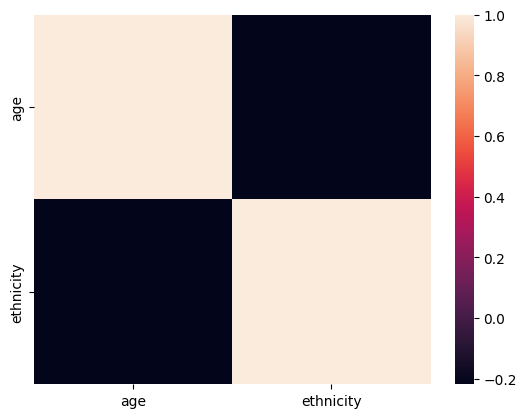

In [23]:
sns.heatmap(data)

In [24]:
df2=df[['age','images']]

In [25]:
df

,age,ethnicity,gender,img_name,pixels,images
0,-1.624362,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,"[[[0.5058824, 0.5019608, 0.5019608], [0.494117..."
1,-1.624362,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,"[[[0.6431373, 0.2901961, 0.43529412], [0.65882..."
2,-1.624362,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,"[[[0.2627451, 0.27450982, 0.2784314], [0.27450..."
3,-1.624362,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,"[[[0.75686276, 0.77254903, 0.7764706], [0.7843..."
4,-1.624362,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,"[[[0.7921569, 0.8039216, 0.81960785], [0.82352..."
...,...,...,...,...,...,...
23700,3.303904,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...,"[[[0.49803922, 0.39215687, 0.36862746], [0.317..."
23701,3.303904,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...,"[[[0.09019608, 0.10980392, 0.1254902], [0.1372..."
23702,3.303904,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...,"[[[0.23137255, 0.19607843, 0.14509805], [0.156..."
23703,3.303904,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...,"[[[0.1764706, 0.42352942, 0.47058824], [0.6117..."


In [26]:
def resize_image(img):
    
    resized_img = np.array(tf.image.resize(img, (128, 128)))
    return resized_img

In [27]:
df['images']= df['images'].apply(resize_image)

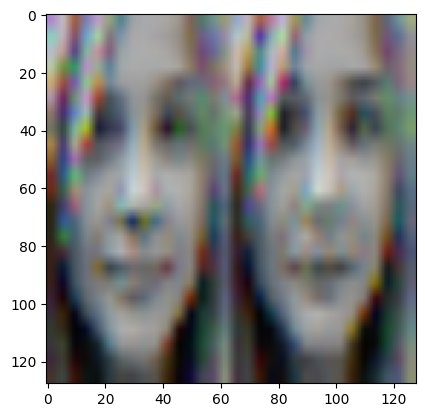

In [28]:
plt.imshow(df['images'][2500])

In [29]:
from sklearn.model_selection import train_test_split
x= np.array(df['images'])
y= np.array(df['age'])

In [30]:
x_train, x_test, y_train,y_test= train_test_split(x,y, random_state=48, test_size=0.2)

In [31]:
print(x_train.shape)
print(y_train.shape)
x_test.shape[0]

(18964,)
(18964,)


4741

In [32]:
x_train =np.stack(x_train)

In [33]:
x_test= np.stack(x_test)

In [34]:
y_test

array([-0.36715117,  1.59409771,  0.08544472, ..., -0.4174396 ,
       -0.31686274, -0.31686274])

In [37]:
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model

In [38]:
input_shape= Input(shape=(128,128,3))

base_model= EfficientNetB4(include_top=False,
                          weights= 'imagenet')
output= base_model(input_shape)

avg_pool= GlobalAveragePooling2D()(output)

Out= Dense(1,activation='linear')(avg_pool)

model= Model(inputs= input_shape, outputs= Out)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 4, 4, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,793 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,675,616 (67.43 MB)

 Trainable params: 17,550,409 (66.95 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [33]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']  
)

In [42]:
model.fit(x_train, y_train,
         epochs=5,
          validation_data=(x_test,y_test),
          batch_size=32,
          validation_steps=x_test.shape[0]
         )

Epoch 1/5


593/593 [==============================] - 1018s 2s/step - loss: 0.4779 - mae: 0.4779 - val_loss: 0.7085 - val_mae: 0.7085
Epoch 2/5
593/593 [==============================] - 919s 2s/step - loss: 0.3663 - mae: 0.3663
Epoch 3/5
593/593 [==============================] - 1320s 2s/step - loss: 0.3264 - mae: 0.3264
Epoch 4/5
593/593 [==============================] - 880s 1s/step - loss: 0.3044 - mae: 0.3044
Epoch 5/5
593/593 [==============================] - 887s 1s/step - loss: 0.2926 - mae: 0.2926


In [39]:
img_input = Input(shape=(128,128,3))

x = Conv2D(128, (3, 3), activation='relu')(img_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (2, 2), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x= Conv2D(128, (3,3))(x)
x = Flatten()(x)
output = Dense(1, activation='linear')(x) 
model2 = Model(inputs=img_input, outputs=output)

In [40]:
model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']  
)

In [ ]:
history = model2.fit(x_train, y_train,
         epochs=10,
          validation_data=(x_test,y_test), batch_size=32)

Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 277s 461ms/step - loss: 0.7067 - mae: 0.7067 - val_loss: 0.5650 - val_mae: 0.5650
Epoch 2/10
356/593 ━━━━━━━━━━━━━━━━━━━━ 1:40 422ms/step - loss: 0.5673 - mae: 0.5673

In [37]:
loss= pd.DataFrame(history.history)

In [38]:
loss

,loss,mae,val_loss,val_mae
0,0.638904,0.638904,0.572935,0.572935
1,0.553612,0.553612,0.548125,0.548125
2,0.528199,0.528199,0.516592,0.516592
3,0.507976,0.507976,0.543260,0.543260
4,0.494777,0.494777,0.530407,0.530407
5,0.482125,0.482125,0.499634,0.499634
6,0.471887,0.471887,0.497267,0.497267
7,0.464865,0.464865,0.473271,0.473271
8,0.458616,0.458616,0.472481,0.472481
9,0.454431,0.454431,0.468171,0.468171


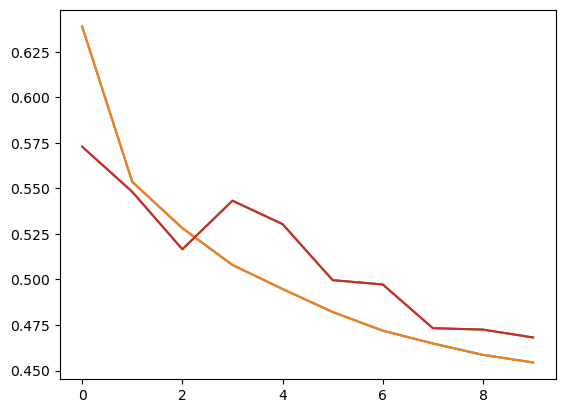

In [39]:
plt.plot(loss)

In [40]:
arr=model2.predict(x_test)

149/149 [==============================] - 12s 76ms/step


In [72]:
arr

array([[-0.6636578 ],
       [ 1.1230417 ],
       [-0.42725143],
       ...,
       [-0.40362385],
       [-0.57474947],
       [ 0.11920665]], dtype=float32)

In [42]:
arr1= model.predict(x_test)

149/149 [==============================] - 45s 283ms/step


In [43]:
arr1

array([[0.1430597 ],
       [0.13941593],
       [0.12219151],
       ...,
       [0.16404554],
       [0.1435433 ],
       [0.111247  ]], dtype=float32)

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
model2.evaluate(x_test, y_test)

149/149 [==============================] - 12s 79ms/step - loss: 0.4682 - mae: 0.4682


[0.4681711494922638, 0.4681711494922638]

In [75]:
mean=df['age'].mean()
std= df['age'].std()

In [76]:
std

19.88570810172122

In [77]:
def destanderdise(x):
    return x*std+mean

In [78]:
vectorized_function = np.vectorize(destanderdise)


In [79]:
arr1= vectorized_function(arr)

In [80]:
arr1

array([[20.103602  ],
       [55.63338739],
       [24.80470979],
       ...,
       [25.27456093],
       [21.87160679],
       [35.67141567]])

In [106]:
image_path="girl.jpg"
img= tf.keras.preprocessing.image.load_img(image_path)

(1600, 720, 3)


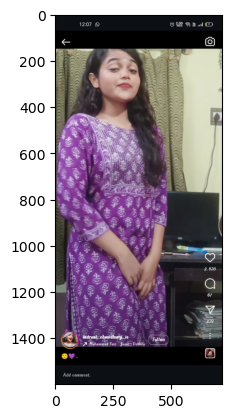

In [107]:
image= tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(image.astype(int))
print(image.shape)

In [108]:
def preprocess(arr):
    arr= arr/255.
    arr= tf.image.resize(arr, (128,128))
    return arr

In [109]:
arr5=preprocess(image)

In [110]:
arr5= tf.expand_dims(arr5, axis=0)

In [111]:
arr5.shape

TensorShape([1, 128, 128, 3])

In [112]:

value1= model2.predict(arr5)

1/1 [==============================] - 0s 18ms/step


In [113]:
destanderdise(value1)

array([[61.69461]], dtype=float32)